<a href="https://colab.research.google.com/github/JMML2021/-Sprint-9.-An-lisi-de-sentiment-i-textos/blob/main/Sprint_9_Text_mining_An%C3%A0lisi_de_sentiment_i_textos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# - Exercici 1
Agafa un text en anglès que vulguis, i calcula'n la freqüència de les paraules.

In [3]:
#Loading NLTK
import nltk

In [4]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

El texto sale de aquí:

https://www.nltk.org/

In [5]:
from nltk.tokenize import sent_tokenize

text="""Natural Language Toolkit
NLTK is a leading platform for building Python programs to work with human language data. It provides easy-to-use interfaces to over 50 corpora and lexical resources such as WordNet, along with a suite of text processing libraries for classification, tokenization, stemming, tagging, parsing, and semantic reasoning, wrappers for industrial-strength NLP libraries, and an active discussion forum.

Thanks to a hands-on guide introducing programming fundamentals alongside topics in computational linguistics, plus comprehensive API documentation, NLTK is suitable for linguists, engineers, students, educators, researchers, and industry users alike. NLTK is available for Windows, Mac OS X, and Linux. Best of all, NLTK is a free, open source, community-driven project.

NLTK has been called “a wonderful tool for teaching, and working in, computational linguistics using Python,” and “an amazing library to play with natural language.”

Natural Language Processing with Python provides a practical introduction to programming for language processing. Written by the creators of NLTK, it guides the reader through the fundamentals of writing Python programs, working with corpora, categorizing text, analyzing linguistic structure, and more. The online version of the book has been been updated for Python 3 and NLTK 3. (The original Python 2 version is still available at https://www.nltk.org/book_1ed.)"""

tokenized_text=sent_tokenize(text)
print(tokenized_text)

['Natural Language Toolkit\nNLTK is a leading platform for building Python programs to work with human language data.', 'It provides easy-to-use interfaces to over 50 corpora and lexical resources such as WordNet, along with a suite of text processing libraries for classification, tokenization, stemming, tagging, parsing, and semantic reasoning, wrappers for industrial-strength NLP libraries, and an active discussion forum.', 'Thanks to a hands-on guide introducing programming fundamentals alongside topics in computational linguistics, plus comprehensive API documentation, NLTK is suitable for linguists, engineers, students, educators, researchers, and industry users alike.', 'NLTK is available for Windows, Mac OS X, and Linux.', 'Best of all, NLTK is a free, open source, community-driven project.', 'NLTK has been called “a wonderful tool for teaching, and working in, computational linguistics using Python,” and “an amazing library to play with natural language.”\n\nNatural Language Pr

In [6]:
from nltk.tokenize import word_tokenize

tokenized_word=word_tokenize(text)
print(tokenized_word)

['Natural', 'Language', 'Toolkit', 'NLTK', 'is', 'a', 'leading', 'platform', 'for', 'building', 'Python', 'programs', 'to', 'work', 'with', 'human', 'language', 'data', '.', 'It', 'provides', 'easy-to-use', 'interfaces', 'to', 'over', '50', 'corpora', 'and', 'lexical', 'resources', 'such', 'as', 'WordNet', ',', 'along', 'with', 'a', 'suite', 'of', 'text', 'processing', 'libraries', 'for', 'classification', ',', 'tokenization', ',', 'stemming', ',', 'tagging', ',', 'parsing', ',', 'and', 'semantic', 'reasoning', ',', 'wrappers', 'for', 'industrial-strength', 'NLP', 'libraries', ',', 'and', 'an', 'active', 'discussion', 'forum', '.', 'Thanks', 'to', 'a', 'hands-on', 'guide', 'introducing', 'programming', 'fundamentals', 'alongside', 'topics', 'in', 'computational', 'linguistics', ',', 'plus', 'comprehensive', 'API', 'documentation', ',', 'NLTK', 'is', 'suitable', 'for', 'linguists', ',', 'engineers', ',', 'students', ',', 'educators', ',', 'researchers', ',', 'and', 'industry', 'users', 

In [7]:
from nltk.probability import FreqDist
fdist = FreqDist(tokenized_word)
print(fdist)

<FreqDist with 137 samples and 247 outcomes>


In [8]:
fdist.most_common(5)

[(',', 28), ('.', 9), ('and', 9), ('for', 8), ('NLTK', 7)]

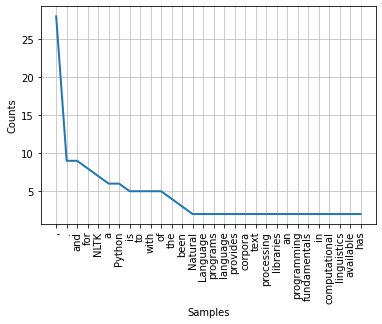

In [9]:
# Frequency Distribution Plot
import matplotlib.pyplot as plt
fdist.plot(30,cumulative=False)
plt.show()

# - Exercici 2
Treu les stopwords i realitza stemming al teu conjunt de dades.

In [17]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
from nltk.corpus import stopwords
#nltk.download('stopwords')

stop_words=set(stopwords.words("english"))
print(stop_words)
print(len(stop_words))

{'is', "don't", 'they', 'o', 'again', 'ourselves', "shan't", 'how', "you'd", "wasn't", 'while', 'didn', 'hadn', 'you', 'was', 'he', 'there', "isn't", "you've", 'same', 'what', 'here', 'it', 'shan', 'we', 'did', 'me', 'yourself', 'into', 't', 'more', 'can', 'weren', "that'll", 'these', 'of', 'am', 'on', "won't", 'once', "mustn't", 'against', 'i', "should've", 'should', 'so', "didn't", 'only', 'by', 'no', 'yourselves', 'has', 'isn', 'wouldn', 'couldn', 'its', 'hasn', 'as', 'the', 'which', 'and', 'where', 'for', 'why', 'haven', 'with', "needn't", 'd', "you'll", 'now', 'both', "couldn't", 'his', 'that', 'just', "she's", 'aren', 'ma', 'very', 'himself', 'mightn', 'having', 'in', 'other', 'through', "you're", 'our', 'y', 'under', 'this', 'if', 'yours', 'don', 'ain', 'each', 'because', 'theirs', 'off', 'doing', 'such', 'nor', 'hers', 'my', 'own', 'whom', 'were', 'to', 'at', 'between', "hadn't", 'about', "haven't", 'been', 'after', "weren't", 'those', 'below', 'm', "wouldn't", 'herself', 'all'

tokenized_text=sent_tokenize(text)

In [19]:
tokenized_sent = tokenized_word

filtered_sent=[]
for w in tokenized_sent:
    #print(w)
    if w not in stop_words:
        filtered_sent.append(w)
print("Tokenized Sentence:",tokenized_sent)
print("Filterd Sentence:",filtered_sent)

Tokenized Sentence: ['Natural', 'Language', 'Toolkit', 'NLTK', 'is', 'a', 'leading', 'platform', 'for', 'building', 'Python', 'programs', 'to', 'work', 'with', 'human', 'language', 'data', '.', 'It', 'provides', 'easy-to-use', 'interfaces', 'to', 'over', '50', 'corpora', 'and', 'lexical', 'resources', 'such', 'as', 'WordNet', ',', 'along', 'with', 'a', 'suite', 'of', 'text', 'processing', 'libraries', 'for', 'classification', ',', 'tokenization', ',', 'stemming', ',', 'tagging', ',', 'parsing', ',', 'and', 'semantic', 'reasoning', ',', 'wrappers', 'for', 'industrial-strength', 'NLP', 'libraries', ',', 'and', 'an', 'active', 'discussion', 'forum', '.', 'Thanks', 'to', 'a', 'hands-on', 'guide', 'introducing', 'programming', 'fundamentals', 'alongside', 'topics', 'in', 'computational', 'linguistics', ',', 'plus', 'comprehensive', 'API', 'documentation', ',', 'NLTK', 'is', 'suitable', 'for', 'linguists', ',', 'engineers', ',', 'students', ',', 'educators', ',', 'researchers', ',', 'and', '

In [20]:
# Stemming
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

ps = PorterStemmer()

stemmed_words=[]
for w in filtered_sent:
    stemmed_words.append(ps.stem(w))

print("Filtered Sentence:",filtered_sent)
print("Stemmed Sentence:",stemmed_words)

Filtered Sentence: ['Natural', 'Language', 'Toolkit', 'NLTK', 'leading', 'platform', 'building', 'Python', 'programs', 'work', 'human', 'language', 'data', '.', 'It', 'provides', 'easy-to-use', 'interfaces', '50', 'corpora', 'lexical', 'resources', 'WordNet', ',', 'along', 'suite', 'text', 'processing', 'libraries', 'classification', ',', 'tokenization', ',', 'stemming', ',', 'tagging', ',', 'parsing', ',', 'semantic', 'reasoning', ',', 'wrappers', 'industrial-strength', 'NLP', 'libraries', ',', 'active', 'discussion', 'forum', '.', 'Thanks', 'hands-on', 'guide', 'introducing', 'programming', 'fundamentals', 'alongside', 'topics', 'computational', 'linguistics', ',', 'plus', 'comprehensive', 'API', 'documentation', ',', 'NLTK', 'suitable', 'linguists', ',', 'engineers', ',', 'students', ',', 'educators', ',', 'researchers', ',', 'industry', 'users', 'alike', '.', 'NLTK', 'available', 'Windows', ',', 'Mac', 'OS', 'X', ',', 'Linux', '.', 'Best', ',', 'NLTK', 'free', ',', 'open', 'source'

In [14]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [15]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [16]:
#Lexicon Normalization
#performing stemming and Lemmatization

from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()

from nltk.stem.porter import PorterStemmer
stem = PorterStemmer()

word = "fly"
print("Lemmatized Word:",lem.lemmatize(word,"v"))
print("Stemmed Word:",stem.stem(word))

Lemmatized Word: fly
Stemmed Word: fli


# - Exercici 2
Treu les stopwords i realitza stemming al teu conjunt de dades.

In [ ]:
sent = "Albert Einstein was born in Ulm, Germany in 1879."

tokens=nltk.word_tokenize(sent)
print(tokens)

['Albert', 'Einstein', 'was', 'born', 'in', 'Ulm', ',', 'Germany', 'in', '1879', '.']


In [ ]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
nltk.pos_tag(tokens)

[('Albert', 'NNP'),
 ('Einstein', 'NNP'),
 ('was', 'VBD'),
 ('born', 'VBN'),
 ('in', 'IN'),
 ('Ulm', 'NNP'),
 (',', ','),
 ('Germany', 'NNP'),
 ('in', 'IN'),
 ('1879', 'CD'),
 ('.', '.')]

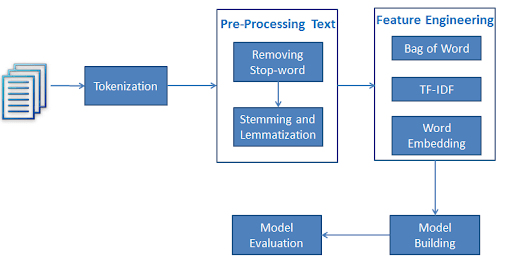

In [ ]:
# Activo Google Drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import pandas
import pandas as pd


data=pd.read_csv('/content/drive/MyDrive/01_COLAB/train.tsv', sep='\t')

In [ ]:
data.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [ ]:
data.iloc[0][2]

'A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .'

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   PhraseId    156060 non-null  int64 
 1   SentenceId  156060 non-null  int64 
 2   Phrase      156060 non-null  object
 3   Sentiment   156060 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 4.8+ MB


In [ ]:
data.Sentiment.value_counts()

2    79582
3    32927
1    27273
4     9206
0     7072
Name: Sentiment, dtype: int64

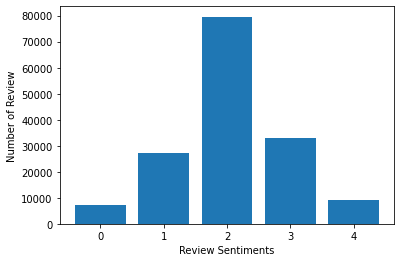

In [ ]:
Sentiment_count=data.groupby('Sentiment').count()
plt.bar(Sentiment_count.index.values, Sentiment_count['Phrase'])
plt.xlabel('Review Sentiments')
plt.ylabel('Number of Review')
plt.show()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
#tokenizer to remove unwanted elements from out data like symbols and numbers
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts= cv.fit_transform(data['Phrase'])

In [ ]:
print(text_counts)

  (0, 11671)	1
  (0, 4517)	1
  (0, 3444)	1
  (0, 294)	1
  (0, 5735)	2
  (0, 5751)	1
  (0, 5512)	1
  (0, 9065)	1
  (0, 593)	1
  (0, 584)	1
  (0, 12673)	1
  (1, 11671)	1
  (1, 4517)	1
  (1, 3444)	1
  (1, 294)	1
  (1, 5735)	1
  (1, 5751)	1
  (2, 11671)	1
  (4, 11671)	1
  (5, 4517)	1
  (5, 3444)	1
  (5, 294)	1
  (5, 5735)	1
  (5, 5751)	1
  (7, 4517)	1
  :	:
  (156050, 11305)	1
  (156050, 9054)	1
  (156051, 11305)	1
  (156051, 9054)	1
  (156052, 11305)	1
  (156053, 11281)	1
  (156053, 1281)	1
  (156053, 5252)	1
  (156053, 6156)	1
  (156053, 1006)	1
  (156053, 2271)	1
  (156054, 11281)	1
  (156054, 5252)	1
  (156054, 6156)	1
  (156054, 1006)	1
  (156054, 2271)	1
  (156055, 11281)	1
  (156055, 6156)	1
  (156056, 5252)	1
  (156056, 1006)	1
  (156056, 2271)	1
  (156057, 1006)	1
  (156057, 2271)	1
  (156058, 1006)	1
  (156059, 2271)	1


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    text_counts, data['Sentiment'], test_size=0.3, random_state=1)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 0.6049169122986885


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()
text_tf= tf.fit_transform(data['Phrase'])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    text_tf, data['Sentiment'], test_size=0.3, random_state=123)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 0.5865265496176684


In [ ]:
import nltk
sentence = """At eight o'clock on Thursday morning Arthur didn't feel very good."""

tokens = nltk.word_tokenize(sentence)
tokens
tagged = nltk.pos_tag(tokens)
tagged[0:6]

[('At', 'IN'),
 ('eight', 'CD'),
 ("o'clock", 'NN'),
 ('on', 'IN'),
 ('Thursday', 'NNP'),
 ('morning', 'NN')]

In [ ]:
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [ ]:
entities = nltk.chunk.ne_chunk(tagged)
#entities

In [ ]:
nltk.download('treebank')

[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Unzipping corpora/treebank.zip.


True

In [ ]:
from nltk.corpus import treebank
t = treebank.parsed_sents('the father')[0]
t.draw()

OSError: ignored

# - Exercici 3
Realitza sentiment analysis al teu conjunt de dades.

In [21]:
import nltk
nltk.download('vader_lexicon')
nltk.download('punkt')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [22]:
import nltk
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
sentences = tokenizer.tokenize(text)

In [23]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import sentiment
from nltk import word_tokenize

In [24]:
analizador = SentimentIntensityAnalyzer()

In [77]:
import statistics

valores=[]

neg=[]
neu=[]
pos=[]
compound=[]


for i, sentence in enumerate(sentences):
    #print(sentence)
    scores = analizador.polarity_scores(sentence)
    print('i= ', i, scores, type(scores))
    neu.append(scores['neu'])
    neg.append(scores['neg'])
    compound.append(scores['compound'])
    pos.append(scores['pos'])
    valores.append(scores)





    '''
    for key in scores:
        print(key, ': ', scores[key])
        #print()
        '''
print('\n Valores: ')
valores[2]['neu']

print('neutros:', neu,'    -> ', round(statistics.mean(neu),2))
print('pos:    ', pos,'    -> ', round(statistics.mean(pos),2))
print('neg:    ', neg,'    -> ', round(statistics.mean(neg),2))
print('Compound:','    -> ', compound, round(statistics.mean(compound),2))

i=  0 {'neg': 0.0, 'neu': 0.865, 'pos': 0.135, 'compound': 0.3612} <class 'dict'>
i=  1 {'neg': 0.0, 'neu': 0.935, 'pos': 0.065, 'compound': 0.4019} <class 'dict'>
i=  2 {'neg': 0.0, 'neu': 0.846, 'pos': 0.154, 'compound': 0.5994} <class 'dict'>
i=  3 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0} <class 'dict'>
i=  4 {'neg': 0.0, 'neu': 0.516, 'pos': 0.484, 'compound': 0.8176} <class 'dict'>
i=  5 {'neg': 0.0, 'neu': 0.689, 'pos': 0.311, 'compound': 0.9313} <class 'dict'>
i=  6 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0} <class 'dict'>
i=  7 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0} <class 'dict'>
i=  8 {'neg': 0.0, 'neu': 0.777, 'pos': 0.223, 'compound': 0.3182} <class 'dict'>

 Valores: 
neutros: [0.865, 0.935, 0.846, 1.0, 0.516, 0.689, 1.0, 1.0, 0.777]     ->  0.85
pos:     [0.135, 0.065, 0.154, 0.0, 0.484, 0.311, 0.0, 0.0, 0.223]     ->  0.15
neg:     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]     ->  0.0
Compound:     ->  [0.3612, 0.4019, 0.5994, 0